### Fetal State Classification Problem using SVM
we are going to build a SVC classifier that helps obstetricians classify the fetal states into three categories:

    1: normal
    2: suspect
    3: pathologic
    
We use cardiotocography dataset available in the UCI Machine Learning Repository. (can be dowloaded using this link: https://archive.ics.uci.edu/ml/machine-learning-databases/00193/CTG.xls)

In this project, we use PCA to reduce the feature space from 36 components to 20 principle components and reduce the correlation between features.
In order to perform Scaling, PCA and building the model, we use Pipeline, and finally run the GridSearchCV to find the best parameters with Cross Validation.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_excel('CTG.xls',sheet_name='Raw Data')
df=df.iloc[1:]
df=df.drop(['FileName','Date','SegFile','DR'],axis=1)

In [4]:
df.head()

,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
1,240.0,357.0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,5.0,632.0,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,177.0,779.0,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
5,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 1 to 2129
Data columns (total 36 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   b         2126 non-null   float64
 1   e         2126 non-null   float64
 2   LBE       2126 non-null   float64
 3   LB        2126 non-null   float64
 4   AC        2126 non-null   float64
 5   FM        2127 non-null   float64
 6   UC        2127 non-null   float64
 7   ASTV      2127 non-null   float64
 8   MSTV      2127 non-null   float64
 9   ALTV      2127 non-null   float64
 10  MLTV      2127 non-null   float64
 11  DL        2128 non-null   float64
 12  DS        2128 non-null   float64
 13  DP        2128 non-null   float64
 14  Width     2126 non-null   float64
 15  Min       2126 non-null   float64
 16  Max       2126 non-null   float64
 17  Nmax      2126 non-null   float64
 18  Nzeros    2126 non-null   float64
 19  Mode      2126 non-null   float64
 20  Mean      2126 non-null   floa

In [9]:
df.describe().transpose() #dataframe statistical information

,count,mean,std,min,25%,50%,75%,max
b,2126.0,878.439793,894.084748,0.0,55.0,538.0,1521.00,3296.0
e,2126.0,1702.877234,930.919143,287.0,1009.0,1241.0,2434.75,3599.0
LBE,2126.0,133.303857,9.840844,106.0,126.0,133.0,140.00,160.0
LB,2126.0,133.303857,9.840844,106.0,126.0,133.0,140.00,160.0
AC,2126.0,2.722484,3.560850,0.0,0.0,1.0,4.00,26.0
FM,2127.0,7.503056,39.030452,0.0,0.0,0.0,2.00,564.0
UC,2127.0,3.669017,2.877148,0.0,1.0,3.0,5.00,23.0
ASTV,2127.0,47.008933,17.210648,12.0,32.0,49.0,61.00,87.0
MSTV,2127.0,1.335449,0.891543,0.2,0.7,1.2,1.70,7.0
ALTV,2127.0,9.884814,18.476534,0.0,0.0,0.0,11.00,91.0


In [10]:
df.isnull().sum() #Number of missing values in each column.

b           3
e           3
LBE         3
LB          3
AC          3
FM          2
UC          2
ASTV        2
MSTV        2
ALTV        2
MLTV        2
DL          1
DS          1
DP          1
Width       3
Min         3
Max         3
Nmax        3
Nzeros      3
Mode        3
Mean        3
Median      3
Variance    3
Tendency    3
A           3
B           3
C           3
D           3
E           3
AD          3
DE          3
LD          3
FS          3
SUSP        3
CLASS       3
NSP         3
dtype: int64

In [11]:
df=df.dropna() #we simply drop missing values and their entire rows. (the quickest&easiest way!)

In [12]:
df['NSP'].value_counts() #imbalanced target classes. There are three classes labeled 1,2,3

1.0    1655
2.0     295
3.0     176
Name: NSP, dtype: int64

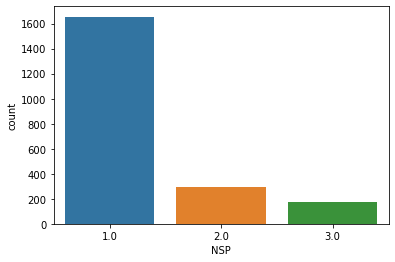

In [13]:
sns.countplot(x=df['NSP']); #imbalanced classes visually

<AxesSubplot:>

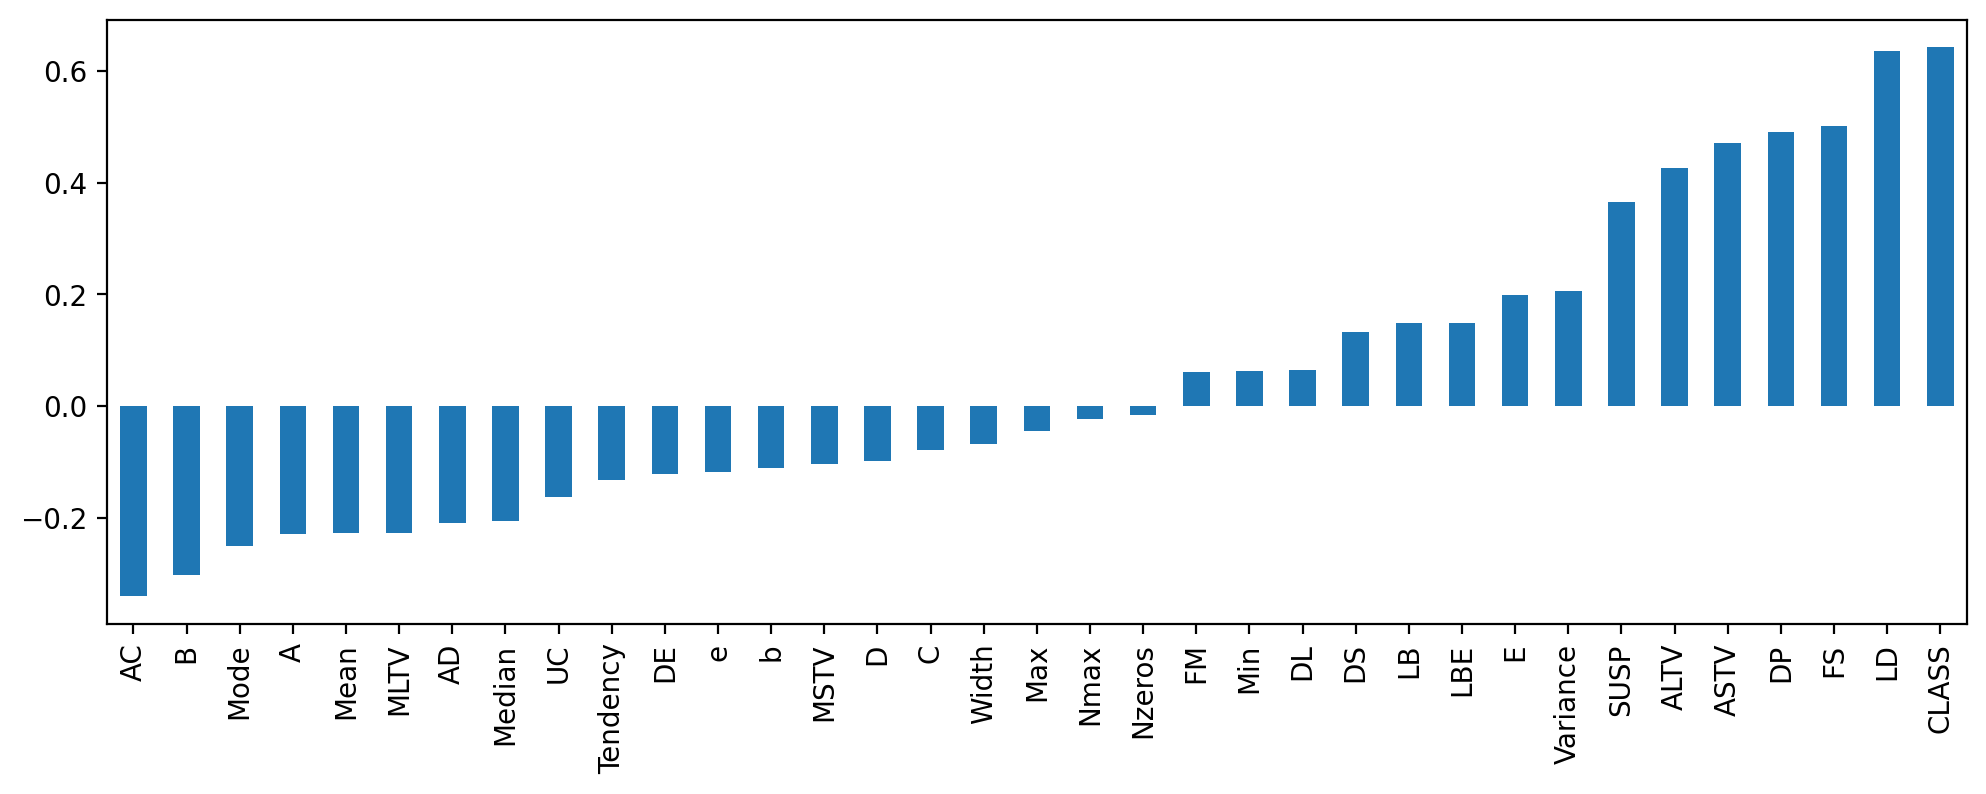

In [14]:
plt.figure(figsize=(12,4),dpi=200) #Correlation between different features and labels visually
df.corr()['NSP'].sort_values()[:-1].plot(kind='bar')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2126 entries, 1 to 2126
Data columns (total 36 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   b         2126 non-null   float64
 1   e         2126 non-null   float64
 2   LBE       2126 non-null   float64
 3   LB        2126 non-null   float64
 4   AC        2126 non-null   float64
 5   FM        2126 non-null   float64
 6   UC        2126 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2126 non-null   float64
 11  DL        2126 non-null   float64
 12  DS        2126 non-null   float64
 13  DP        2126 non-null   float64
 14  Width     2126 non-null   float64
 15  Min       2126 non-null   float64
 16  Max       2126 non-null   float64
 17  Nmax      2126 non-null   float64
 18  Nzeros    2126 non-null   float64
 19  Mode      2126 non-null   float64
 20  Mean      2126 non-null   floa

As we can see, the datset has 2,126 samples with 36 features; its label has 3 classes and it's not balanced. 1,655 cases are class 1, 295 cases are class 2 and 176 cases are class 1. We assume that EDA has been done (we just simply drops unrelated columns and all the NaN valueas) and we are ready to jump into the model training.

The next steps are:

    1) Divide the data into Traing and Testing sets(Train 85%-Test 15% split)
    2) Create Scaler for scaling the data
    3) Create PCA for component reduction
    4) Define the model
    5) Create Pipeline
    6) Using Cross Validation (GridSearchCV) to find the best parameters
    7) Calculating the performance metrics

In [16]:
X=df.drop('NSP',axis=1)
y=df['NSP']

In [17]:
#step 1: 80% training vs 20% test set
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [19]:
#step 2: Create Scaler for scaling the data
from sklearn.preprocessing import StandardScaler

In [20]:
scaler=StandardScaler()

In [21]:
#step 3: Create PCA for component reduction
from sklearn.decomposition import PCA

In [22]:
pca=PCA()

In [23]:
#step 4: Define the model
from sklearn.svm import SVC

In [24]:
svc=SVC()

In [25]:
#step 5: Create Pipeline
from sklearn.pipeline import Pipeline

In [26]:
pipe_model=Pipeline([('scaler',scaler),('pca',pca),('svc',svc)])

In [27]:
#step 6: Using Cross Validation (GridSearchCV) to find the best parameters
from sklearn.model_selection import GridSearchCV

In [28]:
param={'pca__n_components':[5,10,15,20],
      'svc__kernel':['rbf','linear'],
      'svc__C':[0.1,0.5,1,10,20],
      'svc__gamma':['auto','scale']}

In [29]:
grid_model=GridSearchCV(pipe_model,param)

In [30]:
grid_model.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()), ('svc', SVC())]),
             param_grid={'pca__n_components': [5, 10, 15, 20],
                         'svc__C': [0.1, 0.5, 1, 10, 20],
                         'svc__gamma': ['auto', 'scale'],
                         'svc__kernel': ['rbf', 'linear']})

In [31]:
grid_model.best_params_

{'pca__n_components': 10,
 'svc__C': 10,
 'svc__gamma': 'auto',
 'svc__kernel': 'rbf'}

In [32]:
#step 7: Calculating the performance metrics
from sklearn.metrics import classification_report,plot_confusion_matrix

In [33]:
y_pred=grid_model.best_estimator_.predict(X_test)

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.99      0.99      0.99       333
         2.0       0.92      0.95      0.94        64
         3.0       1.00      0.97      0.98        29

    accuracy                           0.98       426
   macro avg       0.97      0.97      0.97       426
weighted avg       0.98      0.98      0.98       426



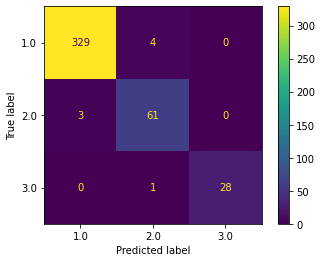

In [35]:
plot_confusion_matrix(grid_model,X_test,y_test)